# Lab 6 - Linear Algebra Exercises

This lab activity is a continuation of lab #5 where you were first introduced to `numpy.linalg`. Here we provide an additional example with `np.linalg.solve()` (Activity 1) as well as examples of decomposition methods using both numpy and scipy modules (activies X & Y) 

In [1]:
# import numpy
import numpy as np

## Activity 1: A practical example of `np.linalg.solve()`

Consider the circuit diagram shown below. You have likely seen a problem exactly like this before in physics II or even circuits I (but it's understandable if you are a bit rusty!). That said, let's see how we can use np.linalg to determine the currents $I_1, I_2$, and $I_3$. 

![](https://s3-us-west-2.amazonaws.com/courses-images-archive-read-only/wp-content/uploads/sites/222/2014/12/20110306/Figure_22_03_05.jpg)

Use Kirchoff's laws to write the system of equations that representing the circuit (Note these are provided below, but you should take a moment to verify they are in fact correct!):
* $I_1 = I_2 + I_3$
* $\varepsilon_1 - I_2 R_2 - I_2 r_1 -I_1 R_1 = 0$
* $ I_1 R_1 + I_3 R_3 +I_3 r_2 -\varepsilon_2 =0$

To start, the system of equations needs to be converted to matrix math in the form $A\vec{x}=\vec{b}$

\begin{align*}
    \begin{pmatrix}
        1 & -1 & -1 \\
        R_1 & (r_1+R_2) & 0 \\
        R_1 & 0 & (r_2+R_3)
    \end{pmatrix}
    \begin{pmatrix}
        I_1 \\ I_2 \\ I_3
    \end{pmatrix}
    =
    \begin{pmatrix}
        0 \\ \varepsilon_1 \\ \varepsilon_2
    \end{pmatrix}
\end{align*}

In [5]:
### Add your code below to define the matrix A and the vector b corresponding to the equations above
R1 = 6
R2 = 2.5
R3 = 1.5
r1 = 0.5
r2 = 0.5
E1 = 18
E2 = 45
A = np.array([
        [1, -1, -1],
        [R1, r1 + R2, 0],
        [R1, 0, r2 + R3]
    ])
b = np.array([0, E1, E2])

Print the matricies to verify they are correct

In [6]:
print("Matrix A:")
print(A)

print('\n') #newline to add space

print("Vector b:")
print(b)

Matrix A:
[[ 1. -1. -1.]
 [ 6.  3.  0.]
 [ 6.  0.  2.]]


Vector b:
[ 0 18 45]


Now solve for the vector x

In [4]:
x = np.linalg.solve(A, b)

print("Vector x:")
print(x)

Vector x:
[ 4.75 -3.5   8.25]


Check - The solution should be [-4.75,  3.5,  -8.25] if everything has been set up correctly. 

## Activity 2: LU Decomposition

Recall our discussion of LU dcomposition from class. This method used when we have problems of the form $A\vec{x}=\vec{b}$. In it we are motivated to find two matricies, one upper triangular $U$ and one lower triangular $L$, that satisfy the relation $LU=A$.

In [7]:
# import lu from scipy.linalg
from scipy.linalg import lu

For this activity, we will consider a matrix called $B$ to perform LU decomposition on

In [8]:
# our B matrix
B = np.array([
        [7, 3, -1, 2, 5],
        [2, -4, -1, 6, 0],
        [2, -3, 8, 1, -4],
        [-1, 1, 4, -1, 3],
        [6, 0, 2, 2, -4]   
    ])

Now we will perform the LU decomposition

In [10]:
P, L, U =lu(B)

Print both L and U. Verify they are lower and upper triangular in form

In [11]:
print("Matrix L:")
print(L)

print('\n') #newline to add space

print("Vector U:")
print(U)

Matrix L:
[[ 1.          0.          0.          0.          0.        ]
 [ 0.28571429  1.          0.          0.          0.        ]
 [ 0.28571429  0.79411765  1.          0.          0.        ]
 [-0.14285714 -0.29411765  0.41196013  1.          0.        ]
 [ 0.85714286  0.52941176  0.3654485  -0.47121821  1.        ]]


Vector U:
[[ 7.          3.         -1.          2.          5.        ]
 [ 0.         -4.85714286 -0.71428571  5.42857143 -1.42857143]
 [ 0.          0.          8.85294118 -3.88235294 -4.29411765]
 [ 0.          0.          0.          2.48172757  5.06312292]
 [ 0.          0.          0.          0.         -3.57429719]]


check that LU=B for the above output to verify 

In [12]:
print('Product of LU:')
print(np.dot(L,U).astype(np.int32))

print('\n') #newline to add space

print('Original Matrix B')
print(B)

Product of LU:
[[ 7  3 -1  2  5]
 [ 2 -3 -1  6  0]
 [ 2 -3  8  1 -4]
 [-1  1  4 -1  3]
 [ 6  0  1  2 -4]]


Original Matrix B
[[ 7  3 -1  2  5]
 [ 2 -4 -1  6  0]
 [ 2 -3  8  1 -4]
 [-1  1  4 -1  3]
 [ 6  0  2  2 -4]]


Let's look at another example to explore the Permutation Matrix 'P'.
Here we will use the matrix 'C', which is defined below. 

In [13]:
C = np.array([
        [7, 3, -1, 5, 5],
        [8, -4, -1, 2, 0],
        [8, -3, 5, 1, -4],
        [-1, 0, 5, -1, 3],
        [6, 1, -3, 3, -3]   
    ])

Perform LU decomposition and check if $LU=C$

In [14]:
P, L2, U2=lu(C) #perform LU decomposition

In [15]:
print('Product of LU (from matrix C):')
print(np.dot(L2,U2).astype(np.int32))

print('\n') #newline to add space

print('Original Matrix C')
print(C)

Product of LU (from matrix C):
[[ 8 -4 -1  2  0]
 [ 7  3 -1  5  5]
 [ 8 -3  5  1 -4]
 [ 6  1 -3  3 -3]
 [-1  0  5 -1  3]]


Original Matrix C
[[ 7  3 -1  5  5]
 [ 8 -4 -1  2  0]
 [ 8 -3  5  1 -4]
 [-1  0  5 -1  3]
 [ 6  1 -3  3 -3]]


Note, the above matrix is not exactly equal to the original 'C'; however it is the same with some rows exchanged! How do we fix this?

Try the product $PC$ and compare with $LU$

In [16]:
print('Product of PC:')
print(np.dot(P,C).astype(np.int32))

print('\n') 

print('Product of LU (from matrix C):')
print(np.dot(L2,U2).astype(np.int32))

Product of PC:
[[ 8 -4 -1  2  0]
 [ 7  3 -1  5  5]
 [ 8 -3  5  1 -4]
 [ 6  1 -3  3 -3]
 [-1  0  5 -1  3]]


Product of LU (from matrix C):
[[ 8 -4 -1  2  0]
 [ 7  3 -1  5  5]
 [ 8 -3  5  1 -4]
 [ 6  1 -3  3 -3]
 [-1  0  5 -1  3]]


Note that PC = LU. Note it is not problematic to mulitply P by C because the multiplication is effectively unit (and the operation only exchanges rows of the original matrix 'C'

## Activity 3: Cholskey Decompostion
While we only breifly discussed Cholskey Decomposioin in class, let's look at a breif example implementation here.  
Consider the matrix D below

In [17]:
D = np.array([
        [1, 3, 5],
        [3, 13, 23],
        [5, 23, 42], 
    ])

In [18]:
print('Original Matrix D')
print(D)

Original Matrix D
[[ 1  3  5]
 [ 3 13 23]
 [ 5 23 42]]


Perform the cholskey decomposition. Print $L$ and verify it is lower triangular.

In [19]:
L = np.linalg.cholesky(D)

print('Matrix L:')
print(L)

Matrix L:
[[1. 0. 0.]
 [3. 2. 0.]
 [5. 4. 1.]]


Check if $LL^T = D$. Note this is the defined relation for this particular decompostion method.

In [20]:
print('Product of L and L^T:')
print(np.dot(L, L.T))

print('\n') 

print('Original Matrix D')
print(D)

Product of L and L^T:
[[ 1.  3.  5.]
 [ 3. 13. 23.]
 [ 5. 23. 42.]]


Original Matrix D
[[ 1  3  5]
 [ 3 13 23]
 [ 5 23 42]]


Note the agreement, thus verifying the result!

## Activity 4: Iterative methods for solving matrices

In class we discussed iterative methods for solving matricies. Below you can see an implementation of the Gauss-Siedel process. Take a moment to review the code (loops and all) to verify that it does indeed match with the algorithm for Gauss-Siedel. Then, run the code for the provided sample matrix $A$ and $b$.

In [22]:
ITERATION_LIMIT = 100

# initialize the matrix
A = np.array(
    [[10.0, -1.0, 2.0, 0.0],
     [-1.0, 11.0, -1.0, 3.0],
     [2.0, -1.0, 10.0, -1.0],
     [0.0, 3.0, -1.0, 8.0],
    ])

# initialize the RHS vector
b = np.array([6.0, 25.0, -11.0, 15.0])

print("System of equations:")
for i in range(A.shape[0]):
    row = [f"{A[i,j]:3g}*x{j+1}" for j in range(A.shape[1])]
    print("[{0}] = [{1:3g}]".format(" + ".join(row), b[i]))

x = np.zeros_like(b, np.float64)
for it_count in range(1, ITERATION_LIMIT):
    x_new = np.zeros_like(x, dtype=np.float64)
    print(f"Iteration {it_count}: {x}")
    for i in range(A.shape[0]):
        s1 = np.dot(A[i, :i], x_new[:i])
        s2 = np.dot(A[i, i + 1 :], x[i + 1 :])
        x_new[i] = (b[i] - s1 - s2) / A[i, i]
    if np.allclose(x, x_new, rtol=1e-8):
        break
    x = x_new

print(f"Solution: {x}")
error = np.dot(A, x) - b
print(f"Error: {error}")

System of equations:
[ 10*x1 +  -1*x2 +   2*x3 +   0*x4] = [  6]
[ -1*x1 +  11*x2 +  -1*x3 +   3*x4] = [ 25]
[  2*x1 +  -1*x2 +  10*x3 +  -1*x4] = [-11]
[  0*x1 +   3*x2 +  -1*x3 +   8*x4] = [ 15]
Iteration 1: [0. 0. 0. 0.]
Iteration 2: [ 0.6         2.32727273 -0.98727273  0.87886364]
Iteration 3: [ 1.03018182  2.03693802 -1.0144562   0.98434122]
Iteration 4: [ 1.00658504  2.00355502 -1.00252738  0.99835095]
Iteration 5: [ 1.00086098  2.00029825 -1.00030728  0.99984975]
Iteration 6: [ 1.00009128  2.00002134 -1.00003115  0.9999881 ]
Iteration 7: [ 1.00000836  2.00000117 -1.00000275  0.99999922]
Iteration 8: [ 1.00000067  2.00000002 -1.00000021  0.99999996]
Iteration 9: [ 1.00000004  1.99999999 -1.00000001  1.        ]
Iteration 10: [ 1.  2. -1.  1.]
Solution: [ 1.  2. -1.  1.]
Error: [ 2.06480930e-08 -1.25551054e-08  3.61417563e-11  0.00000000e+00]


Notice the result converges very quickly, and has small error on par with the stated tolerace. 

Now, let's try to form a matrix that the algorithm will have a tougher time to solve but will still converge. Re-define $A$ below with values of your choice. Then run the cell below to examine convergence.

**NOTE: Gauss-Seidel converges (generally) when $A$ is:**
- Diagonal dominant ($a_{ii} >> a_{ij}$)
- Symmetric

In [126]:
# initialize the matrix
A = np.array(
    [[11, -1.2, 3.0, 0.0],
     [-1.0, 8.0, -1.5, 4.0],
     [6.2, -7.0, 21.0, -2.0],
     [0.0, 3.0, -4.0, 6.0],
    ])

# initialize the RHS vector
b = np.array([6.0, 25.0, -11.0, 15.0])

In [127]:
ITERATION_LIMIT = 300


print("System of equations:")
for i in range(A.shape[0]):
    row = [f"{A[i,j]:3g}*x{j+1}" for j in range(A.shape[1])]
    print("[{0}] = [{1:3g}]".format(" + ".join(row), b[i]))

x = np.zeros_like(b, np.float64)
for it_count in range(1, ITERATION_LIMIT):
    x_new = np.zeros_like(x, dtype=np.float64)
    print(f"Iteration {it_count}: {x}")
    for i in range(A.shape[0]):
        s1 = np.dot(A[i, :i], x_new[:i])
        s2 = np.dot(A[i, i + 1 :], x[i + 1 :])
        x_new[i] = (b[i] - s1 - s2) / A[i, i]
    if np.allclose(x, x_new, rtol=1e-8):
        break
    x = x_new

print(f"Solution: {x}")
error = np.dot(A, x) - b
print(f"Error: {error}")

System of equations:
[ 11*x1 + -1.2*x2 +   3*x3 +   0*x4] = [  6]
[ -1*x1 +   8*x2 + -1.5*x3 +   4*x4] = [ 25]
[6.2*x1 +  -7*x2 +  21*x3 +  -2*x4] = [-11]
[  0*x1 +   3*x2 +  -4*x3 +   6*x4] = [ 15]
Iteration 1: [0. 0. 0. 0.]
Iteration 2: [0.54545455 3.19318182 0.37954545 1.15643939]
Iteration 3: [0.79028926 2.71673123 0.25858114 1.31402181]
Iteration 4: [0.7713031  2.61288594 0.24457934 1.35660992]
Iteration 5: [0.76379319 2.58802782 0.24256651 1.3676971 ]
Iteration 6: [0.76163035 2.58183646 0.2421972  1.37054657]
Iteration 7: [0.76105565 2.58027065 0.24211632 1.37127555]
Iteration 8: [0.76090689 2.57987239 0.24209691 1.37146174]
Iteration 9: [0.76086874 2.57977089 0.24209207 1.37150927]
Iteration 10: [0.76085899 2.579745   0.24209085 1.3715214 ]
Iteration 11: [0.7608565  2.5797384  0.24209054 1.37152449]
Iteration 12: [0.76085586 2.57973671 0.24209046 1.37152528]
Iteration 13: [0.7608557  2.57973628 0.24209044 1.37152548]
Iteration 14: [0.76085566 2.57973617 0.24209043 1.37152554]
So

### Actvity 5 (Optional): Can you grapically show convergence of the Gauss-Seidel process?

For this activity, it may help to think back to the $sin(x)$ activity we did earlier. Note that you will need to modify some of the above code to track the error with each iteration. 

In [128]:
### ADD CODE AND CELLS BELOW AS NEEDED ####
max_iter = 300
iterations = np.arange(0, max_iter, 1)
error_dict = {
    "error0":  [],
    "error1":  [],
    "error2":  [],
    "error3":  []
}

x = np.zeros_like(b, np.float64)
for it_count in range(0, max_iter):
    x_new = np.zeros_like(x, dtype=np.float64)
    #print(f"Iteration {it_count}: {x}")
    for i in range(A.shape[0]):
        s1 = np.dot(A[i, :i], x_new[:i])
        s2 = np.dot(A[i, i + 1 :], x[i + 1 :])
        x_new[i] = (b[i] - s1 - s2) / A[i, i]
    #if np.allclose(x, x_new, rtol=1e-8):
    #    break
    x = x_new
    error = np.dot(A, x) - b
    for i in range(4):
        error_dict[f"error{i}"].append(error[i])

Make a plot of error vs iteration limit below. Most of the plotting code is already provided for you to use, but add a horizontal black line to indicate the value of the tolerance. 

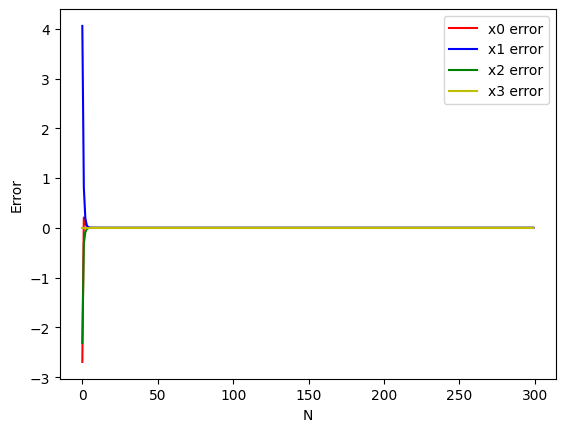

In [129]:
import matplotlib.pyplot as plt

plt.plot(iterations, error_dict[f"error{0}"], 'r-', label='x0 error')
plt.plot(iterations, error_dict[f"error{1}"], 'b-', label='x1 error')
plt.plot(iterations, error_dict[f"error{2}"], 'g-', label='x2 error')
plt.plot(iterations, error_dict[f"error{3}"], 'y-', label='x3 error')
plt.ylabel('Error')
plt.xlabel('N')
plt.legend()
plt.show()

### Last, let's try the same exercise again, but this time let's pick an $A$ that will not converge. Use the same plotting mechanisms developed above to examine the behavior when this method does not converge
What are the keys to this process converging and/or not converging? - Experimentation is encouraged!

In [142]:
# initialize the matrix
A2 = np.array(
    [[1,2,3,4],
     [2,3,4,5],
     [3,4,5,6],
     [4,5,6,7],
    ]
)

# initialize the RHS vector
b2 = np.array([10,2,3,400])

In [143]:
### ADD CODE AND CELLS BELOW AS NEEDED ####
max_iter = 300
iterations = np.arange(0, max_iter, 1)
error_dict = {
    "error0":  [],
    "error1":  [],
    "error2":  [],
    "error3":  []
}

x = np.zeros_like(b2, np.float64)
for it_count in range(0, max_iter):
    x_new = np.zeros_like(x, dtype=np.float64)
    #print(f"Iteration {it_count}: {x}")
    for i in range(A2.shape[0]):
        s1 = np.dot(A2[i, :i], x_new[:i])
        s2 = np.dot(A2[i, i + 1 :], x[i + 1 :])
        x_new[i] = (b2[i] - s1 - s2) / A2[i, i]
    #if np.allclose(x, x_new, rtol=1e-8):
    #    break
    x = x_new
    error = np.dot(A2, x) - b2
    for i in range(4):
        error_dict[f"error{i}"].append(error[i])


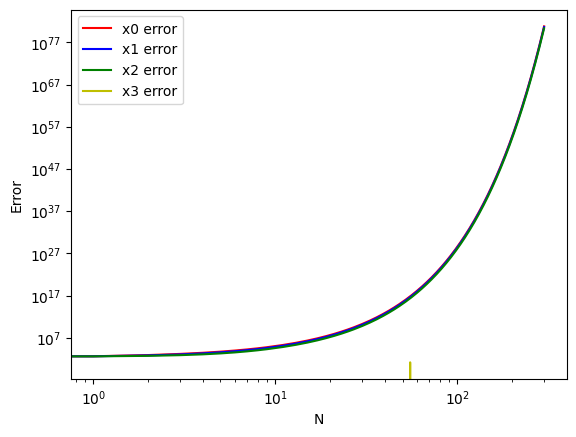

In [146]:
plt.plot(iterations, error_dict[f"error{0}"], 'r-', label='x0 error')
plt.plot(iterations, error_dict[f"error{1}"], 'b-', label='x1 error')
plt.plot(iterations, error_dict[f"error{2}"], 'g-', label='x2 error')
plt.plot(iterations, error_dict[f"error{3}"], 'y-', label='x3 error')
plt.ylabel('Error')
plt.xlabel('N')
plt.yscale('log') 
plt.xscale('log')
plt.legend()
plt.show()

Exponential on a log-log plot is... insanely terrible